<a href="https://colab.research.google.com/github/rokosu/Behavioral-Analytics/blob/main/Behavioral%20Biases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Paper:
***Behavioral Biases in Interest Rate Risk Management: Overconfidence and the Use of Forward Rate Agreements in Nigerian Banks***

Oyetade, John Akinbiyi PhD, FCA,
Lagos State University of Science and Technology, Lagos, Nigeria


**Dataset used for the study**

In [1]:
pip install wbgapi

First 5 rows:
series economy    year  deposit_rate  lend_rate    spread  overconfidence  \
0          NGA  YR2015      9.148333  16.849167  7.700833               1   
1          NGA  YR2016      7.495201  16.868016  9.372815               1   
2          NGA  YR2017      9.554486  17.553333  7.998847               1   
3          NGA  YR2018      9.700712  16.903897  7.203185               1   
4          NGA  YR2019      8.900517  15.376587  6.476070               1   

series  volatility  
0              NaN  
1         0.013328  
2         0.484593  
3         0.459221  
4         1.079971  

Regression Results:
                            OLS Regression Results                            
Dep. Variable:                 spread   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                 -0.097
Method:                 Least Squares   F-statistic:                    0.4687
Date:                Sun, 20 Apr 2025   Prob (F-statistic): 

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


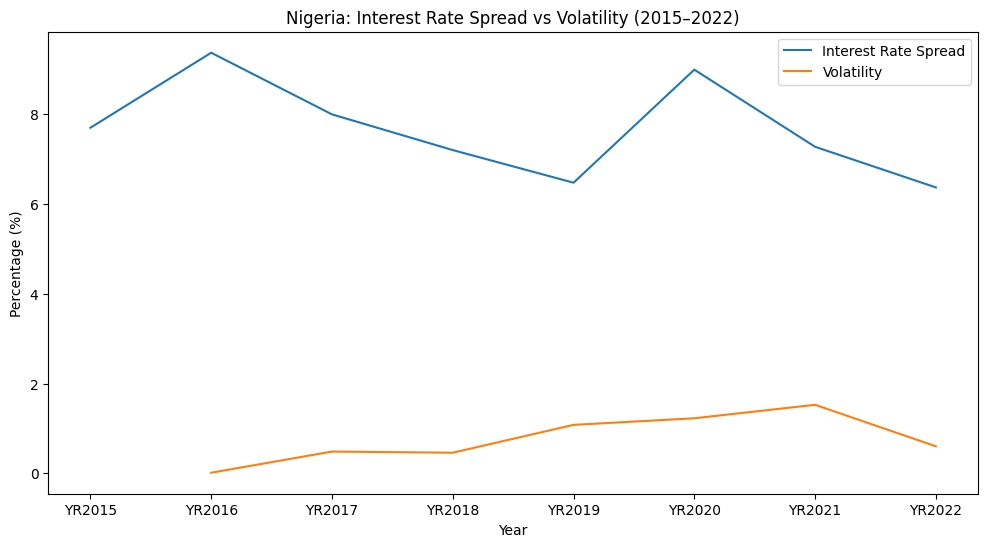

In [2]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

# Fetch World Bank data for Nigeria (2015–2022)
data = wb.data.DataFrame(
    ["FR.INR.LEND", "FR.INR.DPST"],  # Lending/deposit rates
    economy="NGA",
    time=range(2015, 2023)
)

# ----------------------------------------
# Key Fix: Properly handle WBAPI's data structure
# ----------------------------------------
# 1. Convert to tidy long format
data = data.stack().reset_index()
data.columns = ['series', 'year', 'rate']  # Rename columns

# 2. Add economy column explicitly
data['economy'] = 'NGA'  # Nigeria's ISO3 code

# 3. Pivot to wide format
data = data.pivot_table(
    index=['economy', 'year'],
    columns='series',
    values='rate'
).reset_index()

# 4. Rename columns
data = data.rename(columns={
    'FR.INR.LEND': 'lend_rate',
    'FR.INR.DPST': 'deposit_rate'
})

# ----------------------------------------
# Analysis
# ----------------------------------------
# Calculate spread and volatility
data['spread'] = data['lend_rate'] - data['deposit_rate']
data['overconfidence'] = (data['spread'] > 5.0).astype(int)
data['volatility'] = data['lend_rate'].rolling(window=2).std()

print("First 5 rows:")
print(data.head())

# Regression analysis
model = ols('spread ~ volatility + overconfidence', data=data).fit()
print("\nRegression Results:")
print(model.summary())

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='spread', data=data, label='Interest Rate Spread')
sns.lineplot(x='year', y='volatility', data=data, label='Volatility')
plt.title("Nigeria: Interest Rate Spread vs Volatility (2015–2022)")
plt.ylabel("Percentage (%)")
plt.xlabel("Year")
plt.legend()
plt.show()